# Expand harmonic modal superposition with DPF {#ref_msup}

Different types of linear dynamics expansions are implemented in DPF.
With modal superposition used in harmonic analysis, modal coefficients
are multiplied by mode shapes (of a previous modal analysis) to analyse
a structure under given boundary conditions in a range of frequencies.
Doing this expansion \"on demand\" in DPF instead of in the solver
reduces the size of the result files.


In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples

# Create data sources

Create data sources with the mode shapes and the modal response. The
expansion is recursive in DPF: first the modal response is read. Then,
\"upstream\" mode shapes are found in the data sources, where they are
read and expanded (mode shapes x modal response)


In [2]:
msup_files = examples.download_msup_files_to_dict()
data_sources = dpf.DataSources(msup_files["rfrq"])
up_stream_data_sources = dpf.DataSources(msup_files["mode"])
up_stream_data_sources.add_file_path(msup_files["rst"])

data_sources.add_upstream(up_stream_data_sources)

# Compute displacements

Once the `add_upstream()` method puts the recursivity in the data
sources, in a harmonic, transient, or modal analysis, computing
displacements with or without expansion has the exact same syntax.


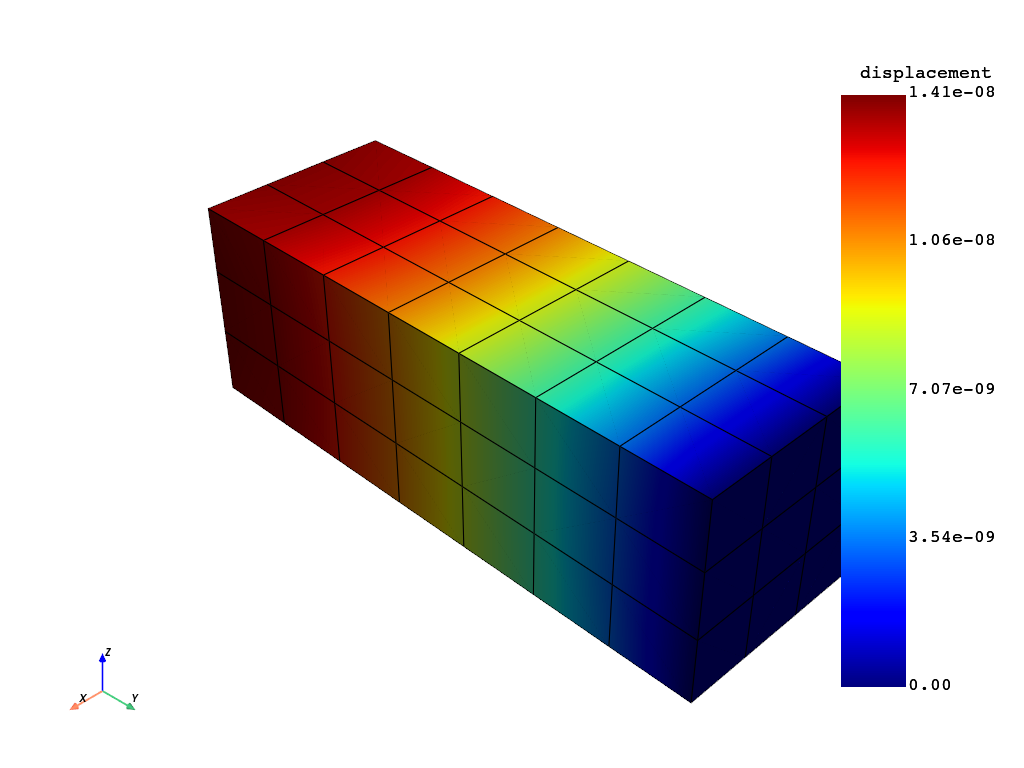

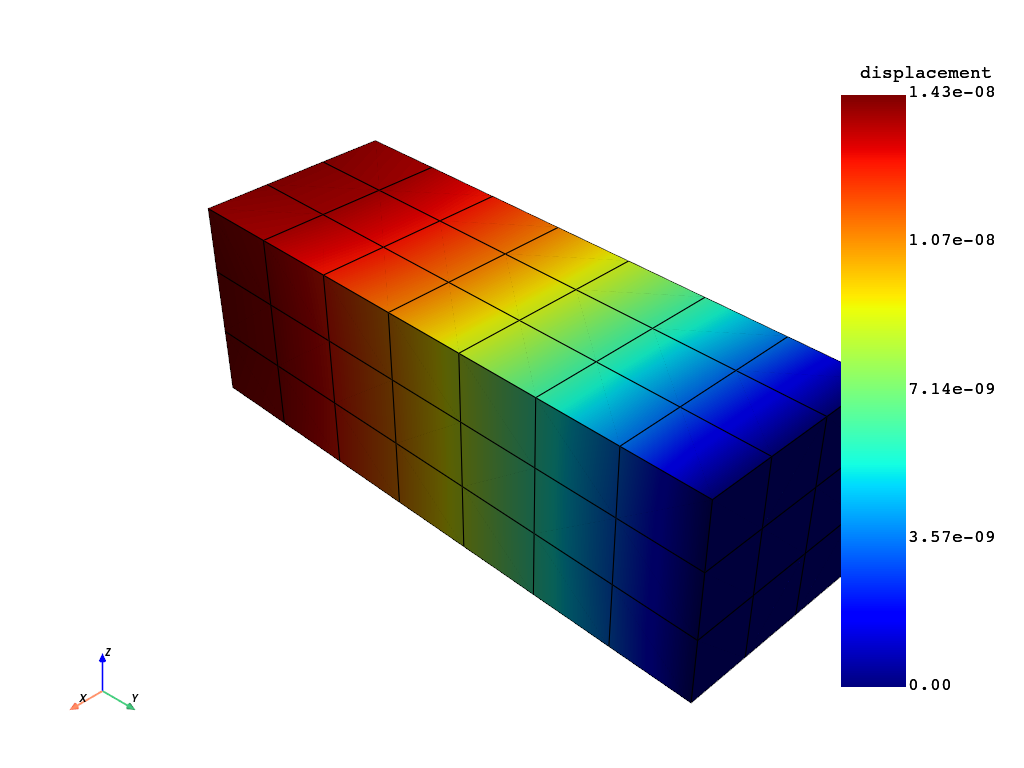

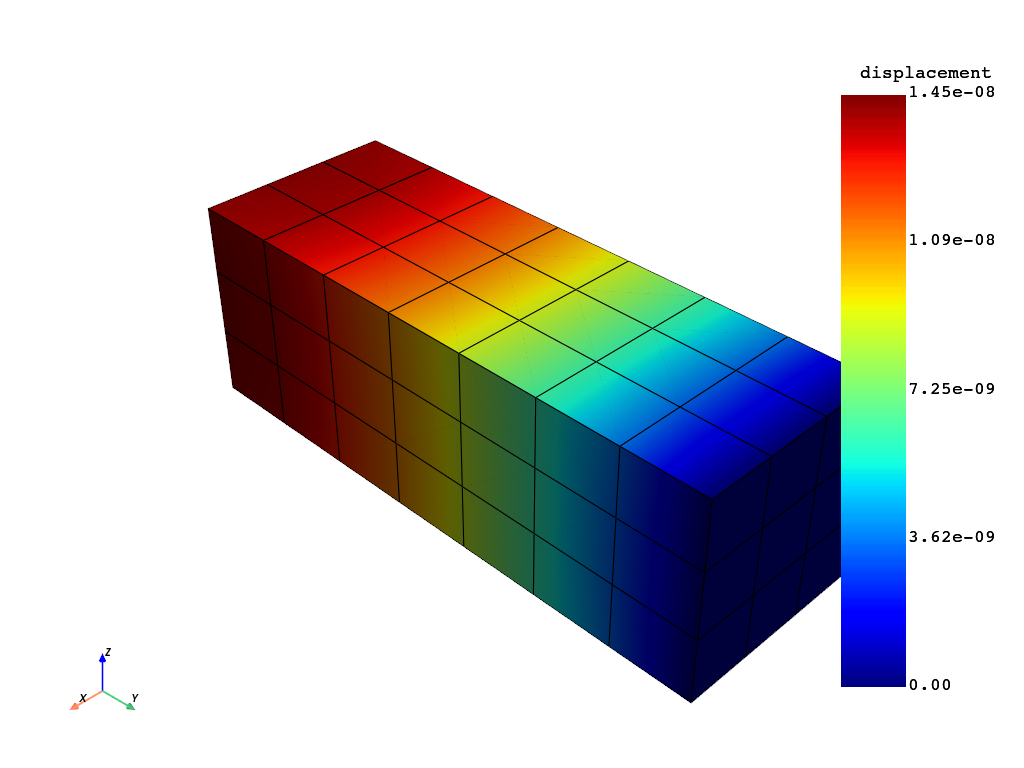

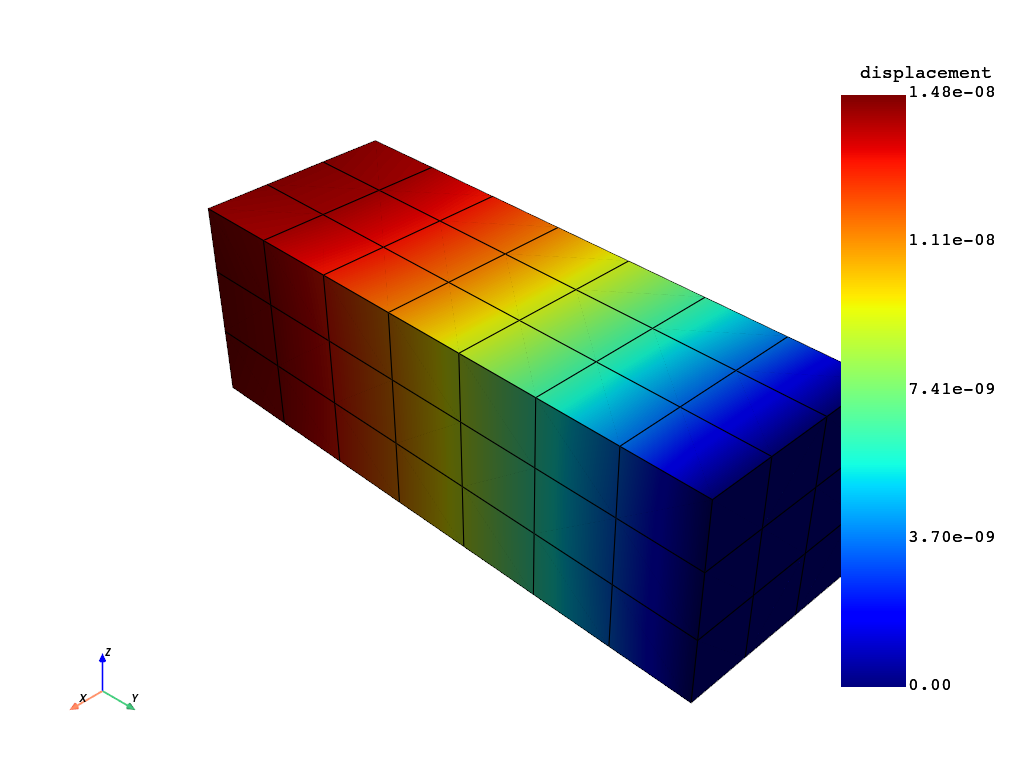

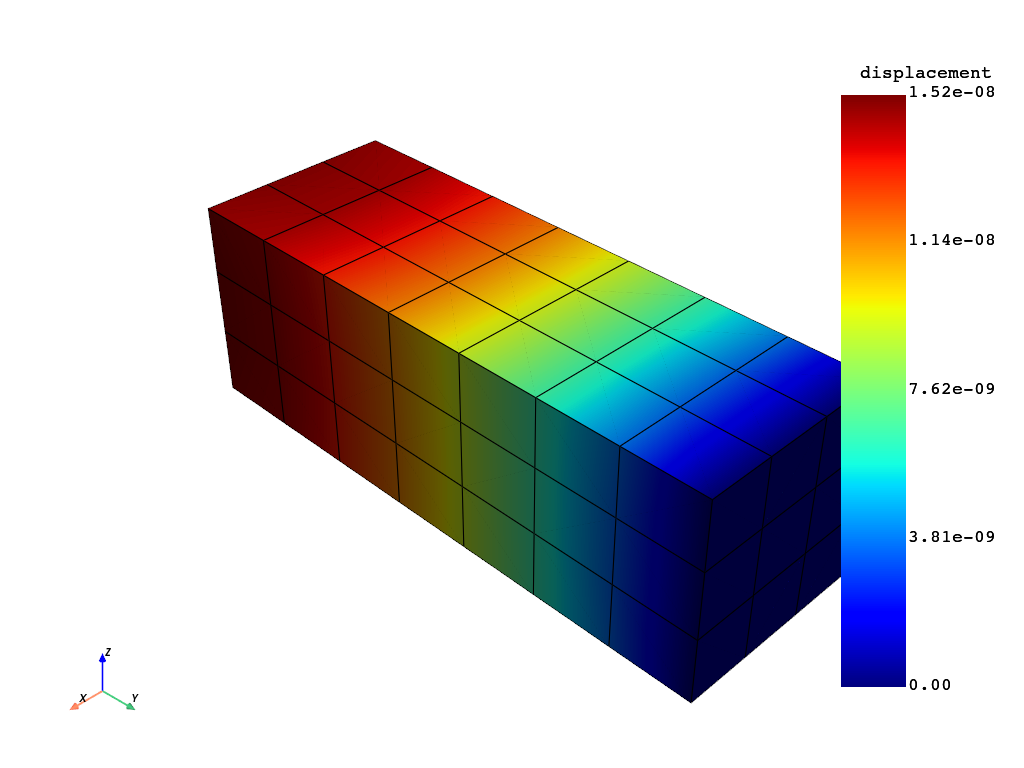

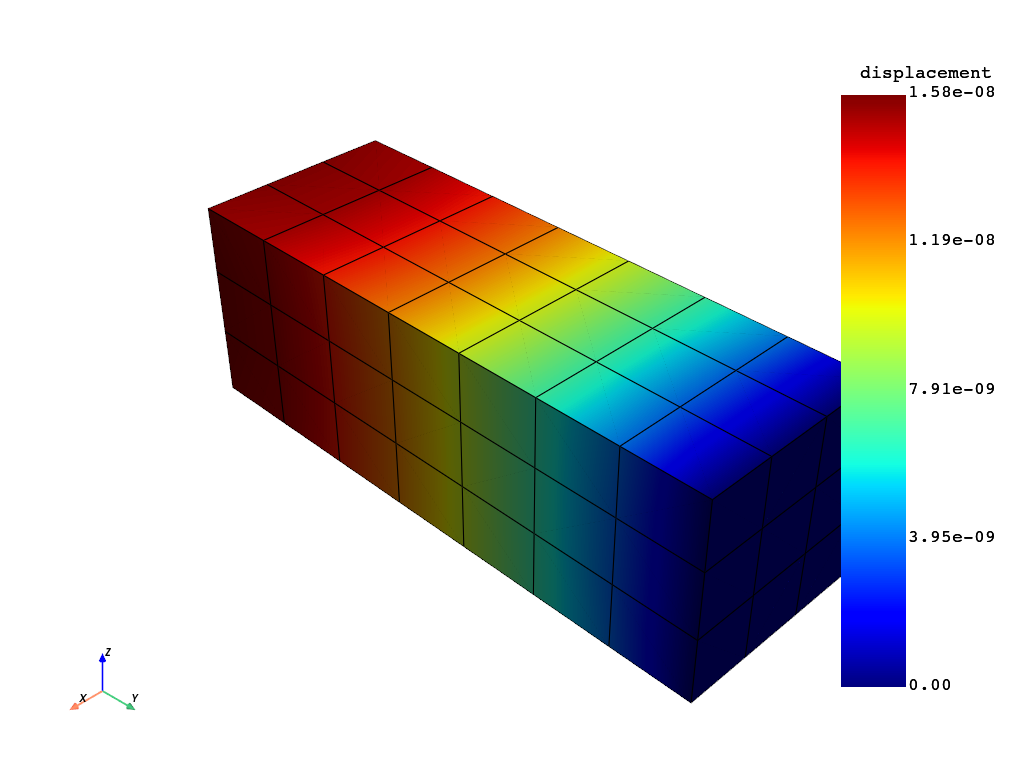

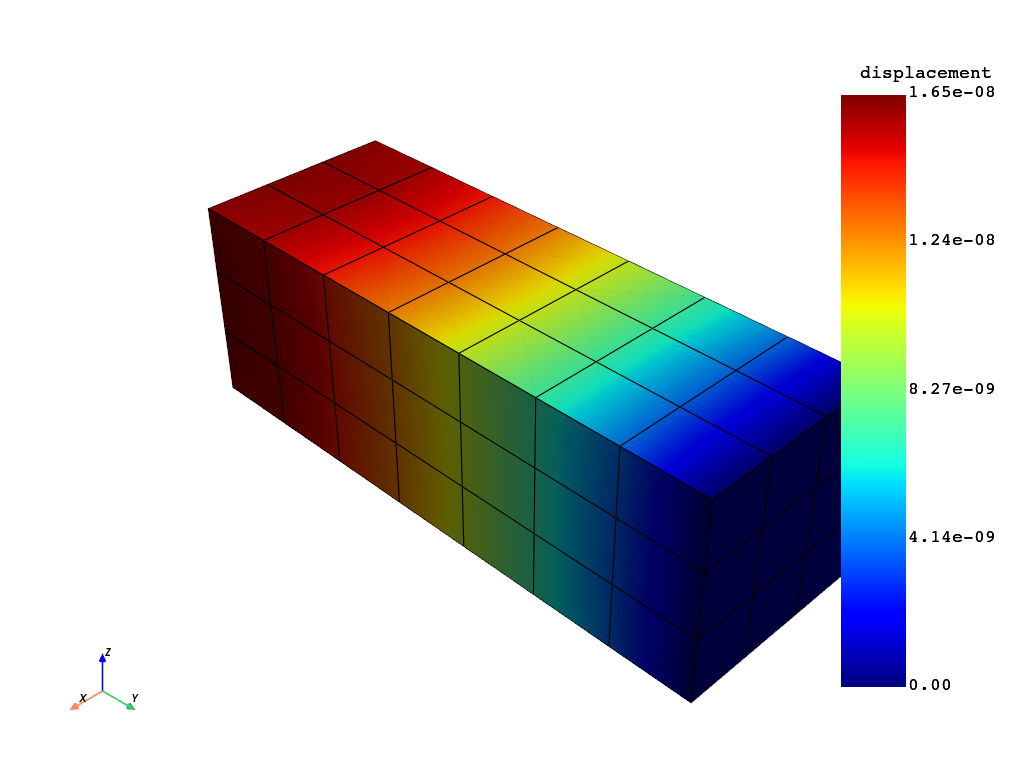

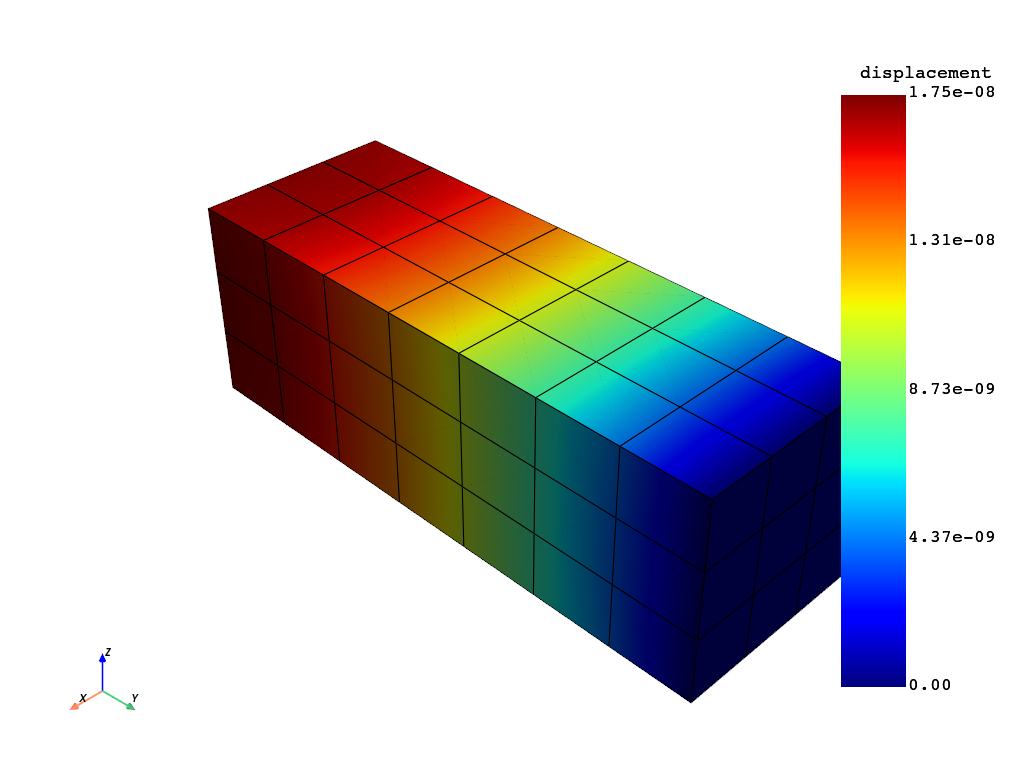

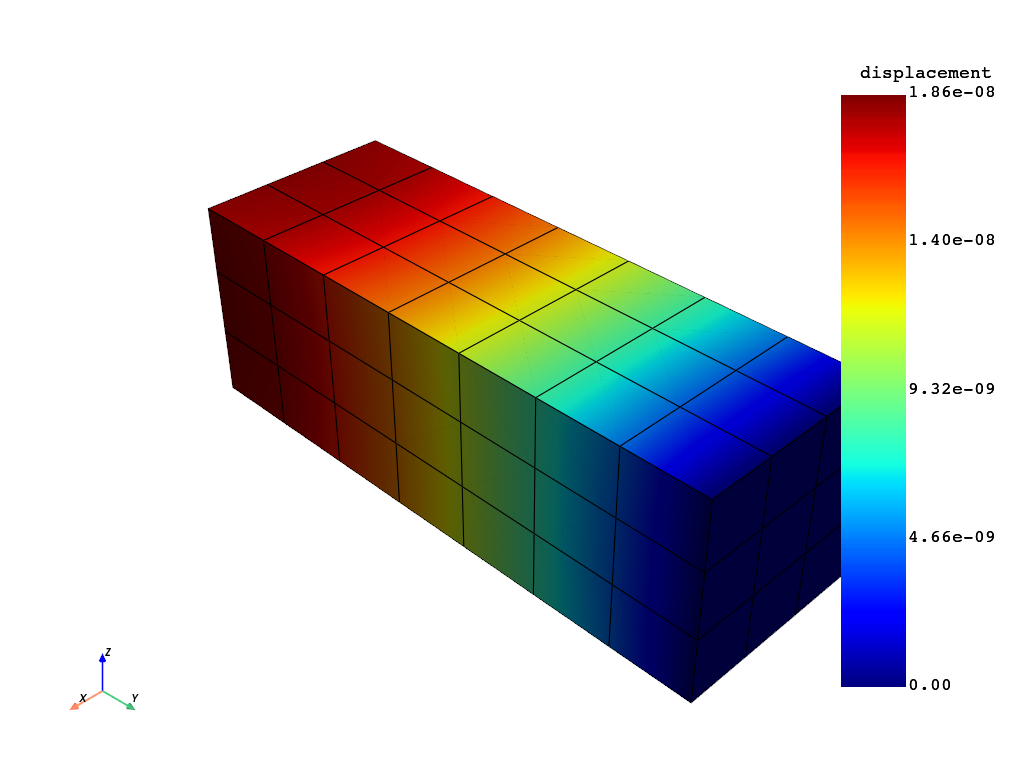

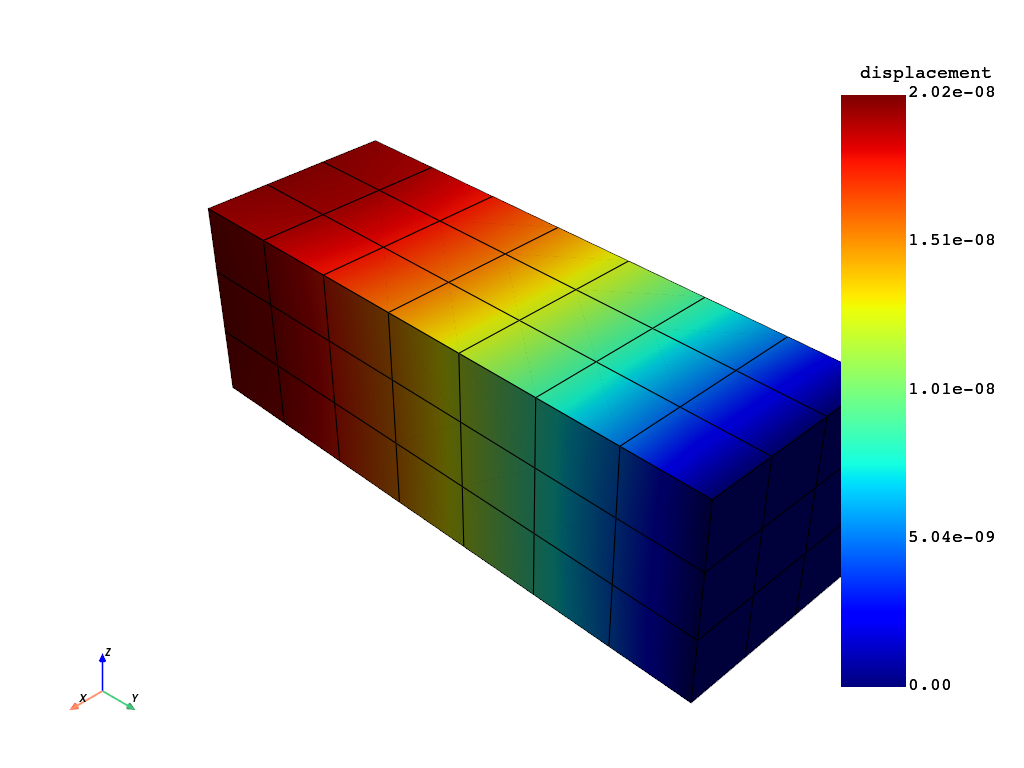

In [3]:
model = dpf.Model(data_sources)
disp = model.results.displacement.on_all_time_freqs.eval()

freq_scoping = disp.get_time_scoping()
for freq_set in freq_scoping:
    model.metadata.meshed_region.plot(disp.get_field_by_time_complex_ids(freq_set, 0))